In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv(r'C:\Users\sampf\Downloads\archive (1)\Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.shape

(414, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
# Calculate correlation between variables. We can see number of convenience stores and distance to nearest MRT station are most correlated with house price per unit area. Included regplots of these 2 variables below to visualize the correlation.
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

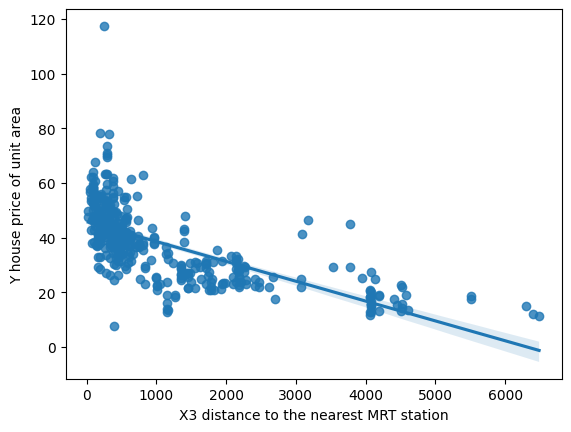

In [6]:
sns.regplot(data =df, x = df['X3 distance to the nearest MRT station'], y =df['Y house price of unit area'])

<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

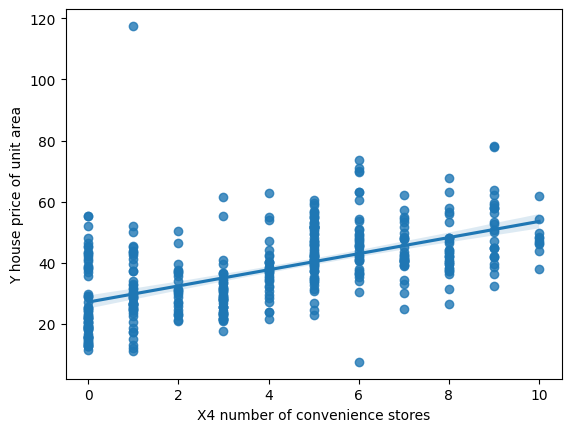

In [7]:
sns.regplot(data =df, x = df['X4 number of convenience stores'], y =df['Y house price of unit area'])

<Axes: >

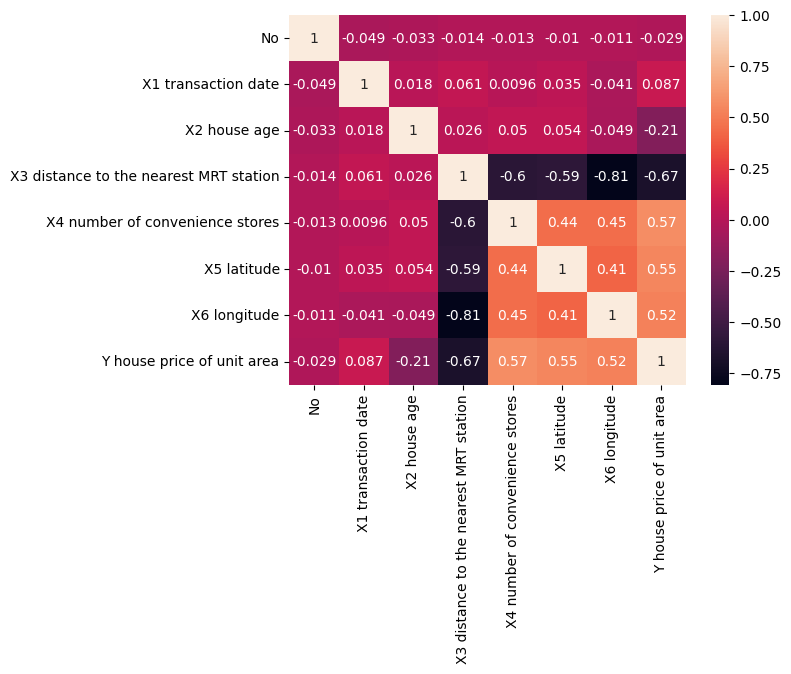

In [8]:
sns.heatmap(df.corr(), annot = True)

In [9]:
#Split data into training and test sets, test sets are 20% of our data. Calculate r2 and MSE to assess our model.
x_data = df.drop('Y house price of unit area', axis = 1)
y_data = df['Y house price of unit area']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1 )

lre = LinearRegression()

lre.fit(x_train, y_train)

print("R2", lre.score(x_test, y_test))

y_hat = lre.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
print("MSE", mse)

R2 0.706199077741642
MSE 44.59488239501404


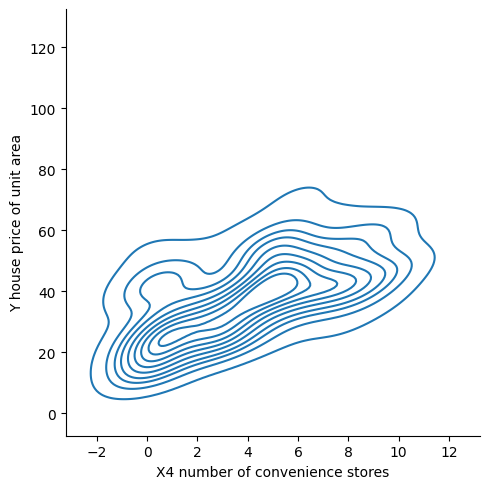

In [22]:
# Plot residual errors between y and yhat
residuals = y_test - y_hat
sns.displot(data = df, x= 'X4 number of convenience stores', y = 'Y house price of unit area', kind = 'kde')

<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

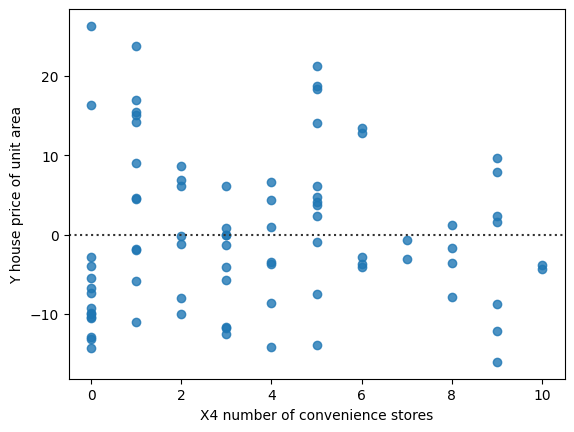

In [11]:
#Plot residual errors between observed price and predicted price based on number of convenience stores nearby. Randomness of residuals shows our model is a good fit.
sns.residplot(x = x_test['X4 number of convenience stores'], y = y_test)

In [12]:
# Using Pipeline constructor to refine our model. Our r2 is .71 and was .70 before, so almost no improvement in our model accuracy.

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
z = x_data.astype(float)

pipe.fit(z, y_data)
ypipe = pipe.predict(z)
print("R2", pipe.score(z,y_data))
print("MSE", mean_squared_error(y_data, ypipe))


R2 0.712245732681718
MSE 53.14513933571527


In [13]:
# Implementing Ridge Regression and finding optimal alpha using grid search. Again, we see little improvement in the models ability to predict home prices/sqft
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
parameters = [{'alpha': [0, .0001, .001, .01, 1, 10, 100, 1000, 10000]}]
RR = Ridge()

grid1 = GridSearchCV(RR, parameters, cv = 4)
grid1.fit(x_data, y_data)

BestRR = grid1.best_estimator_
print("Best alpha", BestRR)
print("Best R2", BestRR.score(x_test, y_test))


Best alpha Ridge(alpha=0.001)
Best R2 0.7262874684183787


In [14]:
# Linear Regression using Cross Validation. We only have 400 rows of data, so are unable to split the data into folds with enough data to generate a good model.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

lre = LinearRegression()
yhat = cross_val_predict(lre, x_data, y_data, cv = 2)
rcross = cross_val_score(lre, x_data, y_data, cv = 2)
rcross.mean()

np.float64(0.5697725801553701)